<a href="https://colab.research.google.com/github/cynthialmy/Sentiment-Analysis-with-Scikit-learn/blob/main/Complete_Sentiment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Sentiment Analysis

Sentiment analysis is a technique used in natural language processing (NLP) to identify and extract subjective information from text, such as opinions, attitudes, emotions, and feelings. 
## Yelp Review Data
Yelp is a platform where users can post reviews about businesses, products, and services. Therefore, analyzing Yelp data can provide valuable insights into customers' sentiments towards a particular business or product.



## Overview

1. Introduction to sentiment analysis
2. Data exploration and preprocessing of Yelp restaurant reviews
3. Utilizing NLTK for feature extraction
4. Training a machine learning model with scikit-learn to predict restaurant review stars
5. Bonus: out-of-box techniques:
  - VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
  - Roberta Pretrained Model from HuggingFace🤗
  - HuggingFace Pipeline


Video about Sentiment Analysis: https://www.youtube.com/watch?v=i4D5DZ5ZG-0

In [ ]:
# imports all the necessary libraries and packages required for 
# performing sentiment analysis using machine learning techniques 
# and natural language processing. 
import pandas as pd # imports the pandas library, which provides data manipulation tools and data structures for Python.
import numpy as np # imports the NumPy library, which provides support for large, multi-dimensional arrays and matrices.
import matplotlib.pyplot as plt # imports the matplotlib library, which provides data visualization tools for Python.
import seaborn as sns # imports the seaborn library, which provides additional data visualization tools and styles for Python.
# imports the Natural Language Toolkit (NLTK), a popular library for natural language processing in Python.
import nltk 
# imports a list of stop words from the NLTK corpus, which are common words that are often removed from text during text processing.
from nltk.corpus import stopwords 
# downloads the stop words list from the NLTK corpus.
nltk.download('stopwords') 
import string # imports a built-in module that provides a list of common punctuation characters.
import math # imports a built-in math library that provides mathematical functions and constants.
# imports the CountVectorizer class from the scikit-learn library, which is used for text feature extraction.
from sklearn.feature_extraction.text import CountVectorizer 
# imports functions for splitting data into training and testing sets, and for cross-validation.
from sklearn.model_selection import train_test_split, cross_val_score
# imports the classification_report function from scikit-learn, which generates a report of precision, recall, F1 score, and support for each class.
from sklearn.metrics import classification_report
# imports functions for evaluating classification models, including confusion matrix, accuracy score, ROC AUC score, and ROC curve.
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
# imports GridSearchCV class from scikit-learn for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
# sets the matplotlib backend to inline for displaying plots in the Jupyter notebook.
%matplotlib inline


# downloads the words package from the NLTK corpus, which provides a list of English words.
nltk.download('words')
# downloads the vader_lexicon package from the NLTK corpus, which provides a sentiment lexicon for sentiment analysis.
nltk.download('vader_lexicon')

# installs the transformers package for working with pre-trained models for natural language processing.
!pip install transformers
# imports the AutoTokenizer class from the transformers library, which is used for tokenizing text input.
from transformers import AutoTokenizer
# imports the AutoModelForSequenceClassification class from the transformers library, 
# which is used for performing sequence classification tasks such as sentiment analysis.
from transformers import AutoModelForSequenceClassification
# imports the softmax function from the scipy library, which is used for calculating probabilities in classification models.
from scipy.special import softmax
# sets the pre-trained sentiment analysis model to be used to the Cardiff University's RoBERTa model.
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
# initializes the tokenizer with the pre-trained model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 6.1 MB/s eta 0:00:00


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Sample of dataset

All data set can be accessed and downloaded from Yelp Open Data Set [https://www.yelp.com/dataset/download].

In [ ]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('https://raw.githubusercontent.com/cynthialmy/DataVizLab/main/yelp_dataset/yelp.csv')

In [ ]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
# Your code here
data.shape

Shape of the dataset:


(10000, 10)

In [ ]:
# COLUMN NAMES
print("Column names:")
# Your code here
data.columns

Column names:


Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [ ]:
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
# Your code here
data.dtypes

Datatype of each column:


business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object

In [ ]:
# Take a look at the first few entries
print("Few dataset entries:")
# Your code here
data.head()

Few dataset entries:


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
# Summary of the dataset
print("Summary of the dataset:")
# Your code here
data.describe(include='all')

Summary of the dataset:


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
count,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,4174,1995,10000,NaN,9998,1,6403,NaN,NaN,NaN
top,JokKtdXU7zXHcr20Lrk29A,2011-03-28,fWKvX83p0-ka4JS3dc6E5A,NaN,Great service,review,fczQCSmaWF78toLEmb0Zsw,NaN,NaN,NaN
freq,37,21,1,NaN,2,10000,38,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.777500,NaN,NaN,NaN,0.876800,1.409300,0.701300
std,NaN,NaN,NaN,1.214636,NaN,NaN,NaN,2.067861,2.336647,1.907942
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.000000,2.000000,1.000000


# Explore the Data - Visualization

Let's take a look at the distribution of the reviews in terms of stars

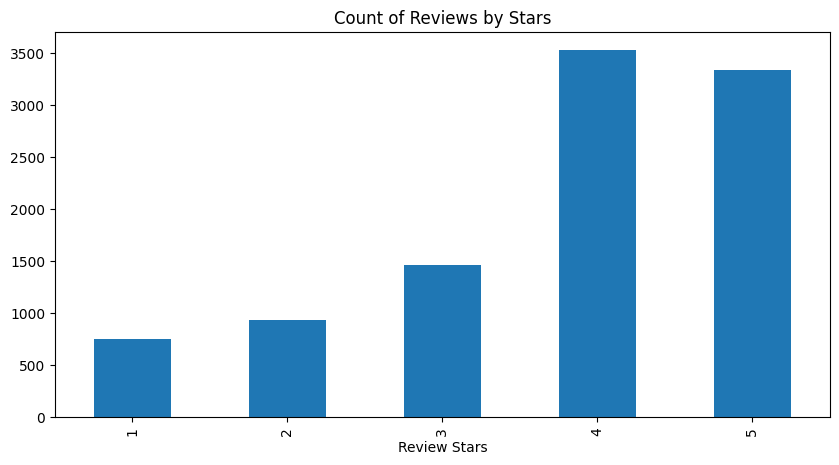

In [ ]:
ax = data['stars'].value_counts().sort_index().plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()


Let us now visualize the if there is any correlation between stars and the length of the review.

In [ ]:
# CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['length'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## Mean Value of the Vote columns

There are 3 voting columns for the reviews - funny, cool and useful. Let us now find the mean values with respect to the stars given to the review.


> Yelp site https://www.yelp.com/biz/wagaya-westside-atlanta

In [ ]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
# Your code here
stval = data.groupby('stars').mean()
stval

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


## Correlation between the voting columns
Let us now see what the correlation is between the three voting columns.

In [ ]:
# FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS
# Your code here
stval.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


We can see that there is negative correlation between:

* Cool and Useful
* Cool and Funny
* Cool and Length  

We can say that the reviews marked cool tend to be short, not very useful to others and short.

Also, there is a positive correlation between:

* Funny and Useful    
* Funny and Length
* Useful and Length    

Thus, we can say that longer reviews tend to be funny and useful.

Classifying the dataset and splitting it into the reviews and stars:

In [ ]:
# Classification in terms of negative (1 star), neutral (3 star), positive (5 star)
# Your code here
data_classes = data[(data['stars']==1)|(data['stars']==3)|(data['stars']==5)]
data_classes.head()
print(data_classes.shape)

(5547, 11)


In [ ]:
# Seperate the dataset into X and Y for prediction
# Your code here
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


# Preprocessing Yelp Data

Yelp data comes in unstructured format, so the first step is to preprocess the data. This includes cleaning the text, removing stop words, and tokenizing the words.

## Vectorization
Vectorization is the process of converting raw text data into a numerical format that can be used as input for machine learning algorithms.

Vectorization involves three key steps:

1. Tokenization: The text is first split into individual words or tokens. This step is important to break down the text into smaller, manageable pieces.

2. Encoding: The tokens are then converted into numerical representations. There are different methods of encoding, but a common one is to represent each token as a unique integer. This is called integer encoding.

3. Vectorization: The integer encoded tokens are then transformed into a vector representation that can be used as input for machine learning algorithms. 

Countvectorizer is a method to convert text to numerical data. 
We will now vectorize a single review and see the results:

In [ ]:
# print out an example of the review
example = data['text'][50]
print(example)

Cliff notes
- Cheap: $1-2/plate
- Fast: It's ready-to-go and on a conveyor
- Acceptable quality: I'm here weekly and haven't gotten sick lol

This place is definitely good for what it is, "it" being a budget-friendly sushi place that's great for a quick bite.  In a response to the lower-rating reviews stating how the food is just okay at best or authentic or blah blah blah, well think of it like wal-mart vs. *inserthighendretailerhere*.  This place has a business model based on selling in large volumes (hence the low prices like wal-mart) so they're gonna have to "reduce costs" somehow (so-so quality food, not-so-attentive staff, and slightly smaller than average portions), but it's still a solid bang-for-your-buck kinda place.

On top of this, I can be in and out quickly since everything is already prepared, perfect for those quick 30 min lunch breaks.  All that's required is for you to grab it off the conveyor (depending on whether or not all the items you want are on the conveyor at

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([example])
vectorizer.get_feature_names_out()

array(['30', 'about', 'acceptable', 'all', 'already', 'an', 'and',
       'answered', 'are', 'as', 'assist', 'at', 'attentive', 'authentic',
       'average', 'bang', 'based', 'be', 'beers', 'before', 'being',
       'best', 'bite', 'blah', 'bombs', 'breaks', 'buck', 'budget',
       'business', 'but', 'by', 'called', 'can', 'cheap', 'cherry',
       'claiming', 'cliff', 'code', 'color', 'contains', 'conveyor',
       'costs', 'counters', 'definitely', 'depending', 'descriptions',
       'diaf', 'do', 'due', 'during', 'even', 'everything', 'expect',
       'fast', 'fend', 'food', 'for', 'friendly', 'further',
       'furthermore', 'go', 'going', 'gonna', 'good', 'gotten', 'grab',
       'great', 'guide', 'had', 'hand', 'has', 'have', 'haven', 'hell',
       'help', 'hence', 'here', 'hold', 'hours', 'how', 'in',
       'inattentive', 'inform', 'inquiries', 'inserthighendretailerhere',
       'is', 'issues', 'it', 'items', 'japanese', 'just', 'kinda',
       'large', 'left', 'like', 'lol

In [66]:
print(X.toarray())

[[ 1  1  1  2  1  1  8  1  1  1  1  2  1  1  1  1  2  3  1  1  1  1  1  3
   1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  3  1  1  1  1  1  1  2
   1  1  1  1  1  1  1  2  8  1  1  1  3  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  3  1  1  1  1  5  1  6  1  1  1  1  2  1  2  2
   1  1  1  1  1  2  1  1  1  1  1  1  3  1  6  1  1  9  3  1  1  1  2  1
   1  4  1  2  1  1  1  1  1  2  2  1  1  1  1  1  1  1  1  1  1  2  1  1
   1  1  1  1  1  1  1  1  4  1  1  1  2  1  1  4  1  1  4 13  1  1  1  1
   1  1  1  5  2  1 12  2  1  1  1  1  2  1  1  1  1  1  2  1  1  1  5  3]]


## Data Cleaning
We will now, define a function which will clean the dataset by removing stopwords and punctuations.

In [ ]:
# # imports the Natural Language Toolkit (NLTK), a popular library for natural language processing in Python.
# import nltk 
# # imports a list of stop words from the NLTK corpus, which are common words that are often removed from text during text processing.
# from nltk.corpus import stopwords 
# # downloads the words package from the NLTK corpus, which provides a list of English words.
# nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# CLEANING THE REVIEWS - REMOVAL OF STOPWORDS AND PUNCTUATION
def text_process(text):
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
# CONVERTING THE WORDS INTO A VECTOR
# Your code here
vocab = CountVectorizer(analyzer=text_process).fit(x)
print('length of the vocab is', len(vocab.vocabulary_))

length of the vocab is 31336


In [ ]:
#     The data that we can see is the transformed words.
#     If we now get the feature's name - we can get the word back
print(vocab.get_feature_names_out()[1000:1100])

['Adult' 'Adults' 'Advisor' 'Advocate' 'Aegean' 'Aerobics' 'Aesthetically'
 'Affordable' 'Africa' 'Afterall' 'Afterdark' 'Afterward' 'Afterwards'
 'Agaves' 'Aged' 'Agent' 'Aggressive' 'Agree' 'Agua' 'Aguila' 'Agwa' 'Ah'
 'Ahab' 'Ahh' 'Ahha' 'Ahhh' 'Ahhhhh' 'Ahhhhhh' 'Ahi' 'Ahmazing'
 'Ahwahtukee' 'Ahwatukee' 'Ai' 'Aid' 'Aiellos' 'Aiko' 'Air' 'Airlines'
 'Airpark' 'Airport' 'Airwarys' 'Airways' 'Airwaysnever' 'Aisha' 'Aji'
 'Ajo' 'Akor' 'Al' 'Alabama' 'Aladdins' 'Alain' 'Alameda' 'Alan' 'Alas'
 'AlasIve' 'Alaska' 'Alaskan' 'Alaus' 'Albacore' 'Albeit' 'Alber'
 'Albertos' 'Albertsons' 'Alcatraz' 'Alcohol' 'Ale' 'Alemmmm' 'Alessias'
 'Alex' 'Alexa' 'Alexs' 'Alfalfa' 'Alfonso' 'Alfred' 'Alfredo' 'Ali'
 'Alice' 'Alicia' 'Alison' 'AllAmerican' 'AllStar' 'Allah' 'Allegiant'
 'Allen' 'Allende' 'Allergic' 'Allesias' 'Allison' 'Allow' 'Allstars'
 'Almond' 'Almost' 'Aloe' 'Aloft' 'Aloha' 'Along' 'Alongside' 'Alp'
 'Alphagraphics' 'Alpine']


Vectorization of the whole review set and and checking the sparse matrix:

In [21]:
# Your code here
x = vocab.transform(x)

#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (5547, 31336)
Non-Zero occurences:  312457
Density of the matrix =  0.17975812697942373


In the above code block, 'vocab' is a CountVectorizer object that has already been fitted to some training data. The transform() method of the CountVectorizer object is being used to transform a new set of input data x into a sparse matrix representation.

A sparse matrix is a matrix where most of the elements are zero, and only a small number of elements are non-zero. In the context of NLP, a sparse matrix is used to represent a collection of text documents where each row corresponds to a document, and each column corresponds to a unique word in the vocabulary.


# Building a Sentiment Classifier

One important benefit of vectorization is that it allows for the application of machine learning algorithms to NLP tasks. For example, once text has been vectorized, it can be used as input for classification models such as logistic regression, decision trees, or neural networks, allowing the machine learning model to learn patterns in the text and make predictions based on those patterns.

In this step, you will train a machine learning model to classify Yelp reviews into positive, negative, or neutral sentiments. You can use a variety of models.

Splitting the dataset X into training and testing set:

In [22]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
# Your code here
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

## Modeling
We will now use multiple Machine Algorithms to see which gives the best performance.
To learn more about the models: https://towardsdatascience.com/all-machine-learning-models-explained-in-6-minutes-9fe30ff6776a

1. Multinomial Naive Bayes (MNB): A simple probabilistic model that is often used for text classification tasks. MNB assumes that the features (words) are conditionally independent given the class label, and it estimates the probability of each class given a set of features using Bayes' rule. It works well for text classification tasks where the features are categorical (e.g., word counts).

In [23]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
score_mnb = round(accuracy_score(y_test,predmnb)*100,2)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",score_mnb)
print("Classification Report:")
print(classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 75  49  38]
 [  7 180 105]
 [ 12  45 599]]
Score: 76.94
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.46      0.59       162
           3       0.66      0.62      0.64       292
           5       0.81      0.91      0.86       656

    accuracy                           0.77      1110
   macro avg       0.75      0.66      0.69      1110
weighted avg       0.77      0.77      0.76      1110



2. Random Forest Classifier (RFC): A popular ensemble method that combines multiple decision trees to improve performance and reduce overfitting. RFC works by building a set of decision trees on different subsets of the training data, using random feature subsets and bootstrap sampling. During prediction, the model aggregates the predictions of each decision tree to obtain a final prediction.

In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Your code here
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
score_rmfr = round(accuracy_score(y_test,predrmfr)*100,2)

print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",score_rmfr)
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 32  29 101]
 [  2  94 196]
 [  1  16 639]]
Score: 68.92
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.20      0.32       162
           3       0.68      0.32      0.44       292
           5       0.68      0.97      0.80       656

    accuracy                           0.69      1110
   macro avg       0.76      0.50      0.52      1110
weighted avg       0.71      0.69      0.64      1110



3. Decision Tree (DT): A simple model that uses a tree-like structure to make decisions based on a set of input features. DT works by recursively splitting the input data into smaller subsets based on the most informative features, until a stopping criterion is reached. DT can be prone to overfitting on noisy data, but can be effective for simple classification tasks with few features.

In [25]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Your code here
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
score_dt = round(accuracy_score(y_test,preddt)*100,2)

print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",score_dt)
print("Classification Report:")
print(classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 63  49  50]
 [ 27 147 118]
 [ 35  99 522]]
Score: 65.95
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.39      0.44       162
           3       0.50      0.50      0.50       292
           5       0.76      0.80      0.78       656

    accuracy                           0.66      1110
   macro avg       0.59      0.56      0.57      1110
weighted avg       0.65      0.66      0.65      1110



4. Support Vector Machines (SVM): A powerful model that works by finding the hyperplane that maximally separates the training data into different classes. SVM can be used for both linear and nonlinear classification tasks, and can be effective for high-dimensional datasets with complex decision boundaries.

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
# Your code here
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
score_svm = round(accuracy_score(y_test,predsvm)*100,2)

print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",score_svm)
print("Classification Report:")
print(classification_report(y_test,predsvm))

5. K-Nearest Neighbor Classifier (KNN): A simple non-parametric model that works by finding the k-nearest neighbors of a new data point in the training set, and assigning the most common class label among its neighbors as the predicted label. KNN can be effective for small datasets with simple decision boundaries, but can be sensitive to the choice of k and the distance metric used.

In [ ]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
# Your code here
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
score_knn = round(accuracy_score(y_test,predknn)*100,2)

print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",score_knn)
print("Classification Report:")
print(classification_report(y_test,predknn))

From the above algorithm modelling, we can list the accuracy for each model:

In [28]:
print('Multinomial Naive Bayes = ',score_mnb,'%') 
print('Support Vector Machine = ',score_svm,'%') 
print('Random Forest Classifier = ',score_rmfr,'%') 
print('Decision Tree = ',score_dt,'%') 
print('K Neighbor Classifier = ',score_knn,'%') 

Multinomial Naive Bayes =  76.94 %
Support Vector Machine =  71.08 %
Random Forest Classifier =  68.92 %
Decision Tree =  65.95 %
K Neighbor Classifier =  61.35 %


In summary, MNB, RFC, DT, SVM, and KNN are all popular models for classification tasks. MNB is simple and efficient, RFC and DT are effective at handling noisy data, SVM is powerful and effective for high-dimensional data, and KNN is simple and effective for small datasets. The choice of model depends on the specific task at hand, the size and complexity of the data, and the desired trade-off between accuracy and computational efficiency.

Since Multinomial Naive Bayes has the best score, let us use it to predict a random positive review, a random average review and a random negative review!

In [ ]:
# POSITIVE REVIEW
pr = data['text'][0]
print(pr)
print("Actual Rating:")
print(data['stars'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mnb.predict(pr_t)[0]

In [ ]:
# AVERAGE REVIEW
ar = data['text'][16]
print(ar)
print("Actual Rating:")
print(data['stars'][16])
# Your code here
ar_t = vocab.transform([ar])
print("Predicted Rating:")
# Your code here
mnb.predict(ar_t)[0]

In [ ]:
# NEGATIVE REVIEW
nr = data['text'][23]
print(nr)
print("Actual Rating:")
print(data['stars'][23])
# Your code here
nr_t = vocab.transform([nr])
print("Predicted Rating:")
# Your code here
mnb.predict(nr_t)[0]

## Bias in dataset

In [32]:
count = data['stars'].value_counts()
print(count)

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64




It is probable that the dataset contains a higher proportion of positive reviews in comparison to negative reviews. To address this issue, normalization of the dataset by equalizing the number of reviews could be a potential solution to mitigate bias.

# Bonus - Out-of-box Tools:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline

In [33]:
# nltk.download('all')
# nltk.download('vader_lexicon')

# Step 1. VADER Scoring 

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that uses a Bag of Words approach to identify sentiment in text.

It uses a lexicon that maps words to their corresponding sentiment scores (positive, negative, or neutral) and applies a set of heuristics to handle negations, intensifiers, and other modifiers that can affect the sentiment of a sentence. 

VADER is known for its speed, simplicity, and effectiveness in handling informal text like social media posts, but it may not perform well on longer or more formal texts.

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Your code here
sia = SentimentIntensityAnalyzer()

In [35]:
# something positive
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [36]:
# something negative
# Your code here
sia.polarity_scores('I am really upset!')

{'neg': 0.614, 'neu': 0.386, 'pos': 0.0, 'compound': -0.4914}

In [37]:
print(example)

Cliff notes
- Cheap: $1-2/plate
- Fast: It's ready-to-go and on a conveyor
- Acceptable quality: I'm here weekly and haven't gotten sick lol

This place is definitely good for what it is, "it" being a budget-friendly sushi place that's great for a quick bite.  In a response to the lower-rating reviews stating how the food is just okay at best or authentic or blah blah blah, well think of it like wal-mart vs. *inserthighendretailerhere*.  This place has a business model based on selling in large volumes (hence the low prices like wal-mart) so they're gonna have to "reduce costs" somehow (so-so quality food, not-so-attentive staff, and slightly smaller than average portions), but it's still a solid bang-for-your-buck kinda place.

On top of this, I can be in and out quickly since everything is already prepared, perfect for those quick 30 min lunch breaks.  All that's required is for you to grab it off the conveyor (depending on whether or not all the items you want are on the conveyor at

In [38]:
# example
# Your code here
sia.polarity_scores(example)

{'neg': 0.056, 'neu': 0.77, 'pos': 0.173, 'compound': 0.9889}

In [39]:
data = data.head(300)

In [40]:
# The code is computing the sentiment scores for the entire dataset

# An empty dictionary res is created to store 
#the sentiment analysis results for each business ID
res = {}

# Your code here
# The for loop iterates over each row in the data DataFrame using the iterrows() method
# The i variable is the current index of the iteration, 
#   and row is the current row of the DataFrame
# The total argument of tqdm is set to the length of 
#   the data DataFrame to display a progress bar
for i, row in tqdm(data.iterrows(), total=len(data)):
  # Extract the text and business ID from the current row of the DataFrame
    text = row['text']
    myid = row['business_id']
    # Apply the VADER sentiment analyzer to the text and 
    #   obtain the resulting sentiment scores as a dictionary
    # Add the resulting dictionary to the `res` dictionary, 
    #   using the business ID as the key
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/300 [00:00<?, ?it/s]

In [41]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'business_id'})
vaders = vaders.merge(data, how='left')

In [42]:
# Now we have sentiment score and metadata
vaders.head()

,business_id,neg,neu,pos,compound,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,0.015,0.687,0.298,0.9950,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,0.049,0.741,0.210,0.9943,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,0.000,0.523,0.477,0.8988,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,0.000,0.793,0.207,0.9531,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,0.029,0.636,0.334,0.9883,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## Plot VADER results

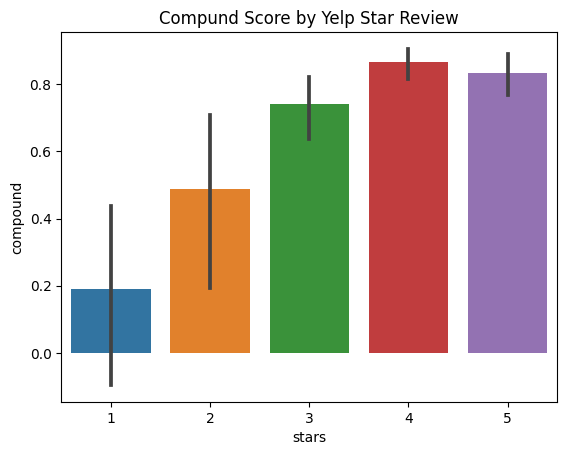

In [43]:
ax = sns.barplot(data=vaders, x='stars', y='compound')
ax.set_title('Compund Score by Yelp Star Review')
plt.show()

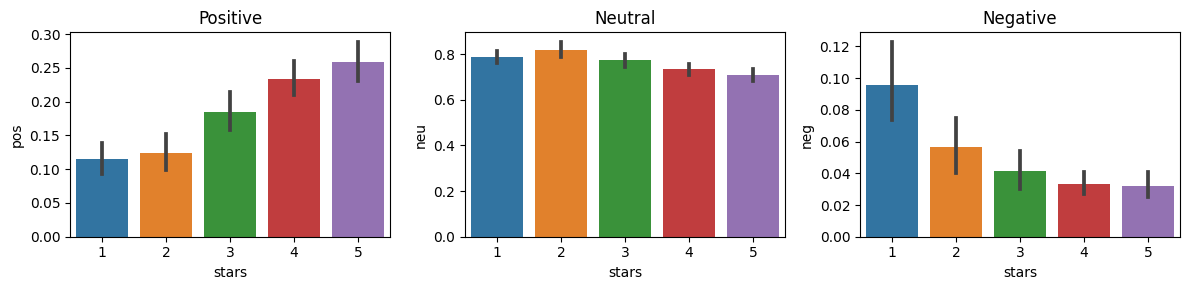

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='stars', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='stars', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model - self-supervised learning approach

RoBERTa is a state-of-the-art pre-trained deep learning model for natural language processing developed by Facebook AI Research. 

RoBERTa is based on the Transformer architecture and is pre-trained on a large corpus of text data using a self-supervised learning approach. 

RoBERTa has shown impressive performance on a range of NLP tasks, including sentiment analysis, and can be fine-tuned for specific tasks with relatively small amounts of labeled data. 

However, RoBERTa requires substantial computational resources for training and inference, and may not be suitable for small-scale or real-time applications.

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [45]:
# !pip install transformers
# from transformers import AutoTokenizer
# from transformers import AutoModelForSequenceClassification
# from scipy.special import softmax
# MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [46]:
# Run for Roberta Model
# The code uses a pre-trained RoBERTa model and tokenizer 
# to classify the sentiment of a given input text

# Tokenize the input text using the pre-trained tokenizer object
# The return_tensors argument specifies that the tokenized text 
# should be returned in PyTorch tensor format.
encoded_text = tokenizer(example, return_tensors='pt')

# Pass the encoded text as input to the pre-trained RoBERTa model and obtain its output
# The ** syntax is used to unpack the tensor as named arguments for the model
output = model(**encoded_text) 

# Extract the predicted class scores from the model output tensor 
# and convert them to a numpy array
scores = output[0][0].detach().numpy()
# Apply the softmax function to convert the class scores into probabilities that sum to 1
scores = softmax(scores)
# Create a dictionary that maps the class names to their corresponding probabilities
# The keys are roberta_neg for the negative class, 
# roberta_neu for the neutral class, and roberta_pos for the positive class
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
# Print the dictionary of class probabilities to the console
print(scores_dict)

{'roberta_neg': 0.024074964, 'roberta_neu': 0.30235398, 'roberta_pos': 0.67357105}


In [47]:
# This is a Python function called polarity_scores_roberta that takes
# a string of text as input and returns a dictionary of sentiment scores for that text

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [48]:
# The code iterates over a pandas DataFrame called data, 
# which is assumed to have columns for text and business IDs

# An empty dictionary res is created to store 
# the sentiment analysis results for each business ID
res = {}
# Your code here

# The for loop iterates over each row in the data DataFrame using the iterrows() method
# The i variable is the current index of the iteration, 
# and row is the current row of the DataFrame
# The total argument of tqdm is set to the length of 
# the data DataFrame to display a progress bar
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
      # Extract the text and business ID from the current row of the DataFrame
        text = row['text']
        myid = row['business_id']

        # Apply the VADER sentiment analyzer to the text and 
        # obtain the resulting sentiment scores as a dictionary
        vader_result = sia.polarity_scores(text)

        # Rename the keys of the VADER sentiment score dictionary to start with "vader_"
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        # Apply the pre-trained RoBERTa model to the text and 
        # obtain the resulting sentiment scores as a dictionary
        roberta_result = polarity_scores_roberta(text)

        # Combine the VADER and RoBERTa sentiment score dictionaries into a single dictionary
        both = {**vader_result_rename, **roberta_result}

        # Add the resulting dictionary to the `res` dictionary, 
        # using the business ID as the key
        res[myid] = both
    
    # If a `RuntimeError` occurs during the sentiment analysis, 
    # print a warning message indicating the business ID that caused the error
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/300 [00:00<?, ?it/s]

Broke for id 7SO_rX1F6rQEl-5s3wZxgQ
Broke for id FCcFT610nQBVcRdY-devQA
Broke for id d7_jkx0VPx3uHsUl18iHMQ
Broke for id LzpR_jE6VIutJ08s2cdRrw
Broke for id 1621ir5mjVgbHwxCbMAEjg
Broke for id l3yL2rQ6PoFBQ06RLczn9w


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'business_id'})
results_df = results_df.merge(data, how='left')

# Step 3. Compare Scores between models

In [ ]:
# take a look at the column of the df
results_df.columns

In [ ]:
# The pair plot is a matrix of scatter plots and histograms, where each variable 
# in the DataFrame is plotted against every other variable. 
# The purpose of the plot is to visualize the relationship 
# between different sentiment scores generated by Vader and RoBERTa models.
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='stars',
            palette='tab10')
plt.show()

# Step 4: Review Examples

## Positive sentiment 1-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [ ]:
# retrieves the text of the row with the highest positive sentiment score 
# using the Vader model among the rows that have a star rating of 1.
# Your code here
results_df.query('stars == 1') \
    .sort_values('vader_pos', ascending=False)['text'].values[0]

# sia.polarity_scores()

In [ ]:
# retrieves the text of the row with the highest positive sentiment score 
# using the RoBERTa model among the rows that have a star rating of 1.
results_df.query('stars == 1') \
    .sort_values('roberta_pos', ascending=False)['text'].values[0]

# polarity_scores_roberta()

## Negative sentiment 5-Star Reviews

In [ ]:
# retrieves the text of the row with the highest negative sentiment score 
# using the Vader model among the rows that have a star rating of 5.
# Your code here
results_df.query('stars == 5') \
    .sort_values('vader_neg', ascending=False)['text'].values[0]

# sia.polarity_scores()

In [ ]:
# retrieves the text of the row with the highest negative sentiment score 
# using the RoBERTa model among the rows that have a star rating of 5.
results_df.query('stars == 5') \
    .sort_values('roberta_neg', ascending=False)['text'].values[0]

# polarity_scores_roberta() 

# Extra: The Transformers Pipeline

Huggingface Pipeline is a high-level API provided by the Hugging Face library, which simplifies the process of running pre-trained models for various NLP tasks, including sentiment analysis. 

The Pipeline interface allows users to quickly and easily apply pre-trained models to text input, without the need for extensive coding or training. 

Quick & easy way to run sentiment predictions

In [ ]:
from transformers import pipeline
# creates a sentiment analysis pipeline using the Hugging Face Transformers library. 
# The pipeline() function is used to create a pre-trained sentiment analysis model 
# that can be used to classify the sentiment of input text.
sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
# something positive
# Your code here
sent_pipeline("this workship is awesome!")

In [58]:
# something negative
# Your code here
sent_pipeline("this workship is bad!")

[{'label': 'NEGATIVE', 'score': 0.9998040795326233}]

[{'label': 'NEGATIVE', 'score': 0.9998040795326233}]

# The End